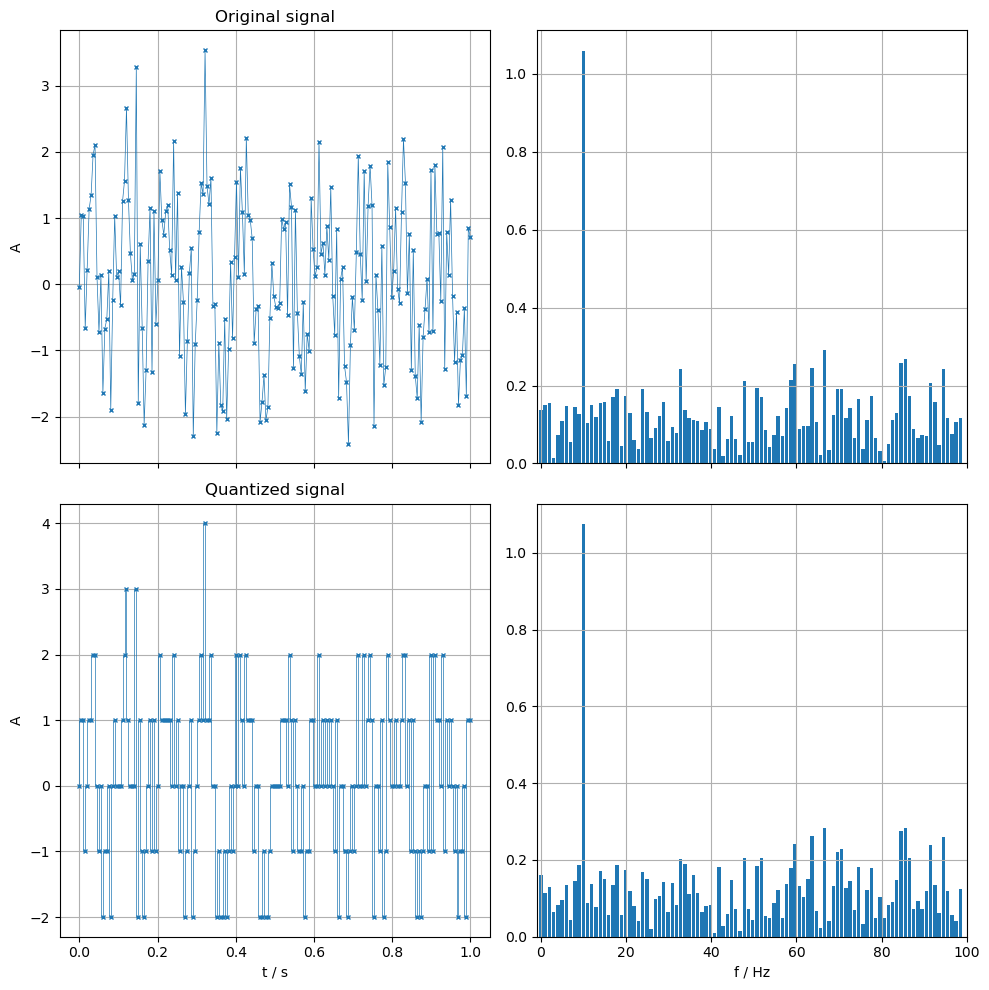

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

N = 200
ts = np.linspace(0, 1, N)
dt = ts[1] - ts[0]
f1 = 10
ys = np.sin(2 * np.pi * f1 * ts) + 1 * np.random.normal(size=N)
ffts = fft(ys)

# Simulate limited resolution
num_bits = 1
quantization_levels = 2 ** num_bits
quantization_step = 2 / quantization_levels
quantized_ys = np.around(ys / quantization_step) * quantization_step

quantized_ffts = fft(quantized_ys)

fig, axs = plt.subplots(2, 2, sharex='col', figsize=(10,10))
axs[0][0].plot(ts, ys, '-x', markersize=3, lw=0.5)
axs[0][0].set(ylabel="A", title="Original signal")
axs[1][0].step(ts, quantized_ys, '-x', markersize=3, lw=0.5)
axs[1][0].set(xlabel="t / s", ylabel="A", title="Quantized signal")
axs[0][1].bar(fftfreq(N, d=dt)[0:N//2], 2.0 / N * np.abs(ffts[0:N//2]))
axs[1][1].bar(fftfreq(N, d=dt)[0:N//2], 2.0 / N * np.abs(quantized_ffts[0:N//2]))
axs[1][1].set(xlim=[-1,100], xlabel="f / Hz")
#axs[1][1].set_yscale('log')
#axs[0][1].set_yscale('log')

axs[0][0].grid()
axs[1][0].grid()
axs[0][1].grid()
axs[1][1].grid()

fig.tight_layout()
plt.show()
fig.savefig('out/quantization')
